In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = '/content/SSL.csv'  # Path to the uploaded dataset
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   THUMB_MCP_angle  INDEX_MCP_angle  MIDDLE_MCP_angle  RING_MCP_angle  \
0       158.850393       166.191120        171.312416      164.417307   
1       179.764919       162.918659        164.688354      158.761507   
2       163.686400       156.874601        168.731120      167.597585   
3       164.877336       157.923103        168.825020      166.714988   
4       162.510311       155.772163        167.382585      167.906615   

   PINKY_MCP_angle  INDEX_PIP_angle  MIDDLE_PIP_angle  RING_PIP_angle  \
0       152.776481       166.274985        168.753093      170.136228   
1       150.168779       165.712954        165.773444      173.676437   
2       155.271677       170.371422        173.189007      178.279313   
3       154.694918       171.259425        173.170858      177.966303   
4       151.483203       164.876201        167.474186      171.706166   

   PINKY_PIP_angle  INDEX_DIP_angle  MIDDLE_DIP_angle  RING_DIP_angle  \
0       170.599224

In [5]:
# Check for missing values and handle them
if data.isnull().sum().sum() > 0:
    print("Missing values detected. Filling with mean values...")
    data.fillna(data.mean(), inplace=True)
else:
    print("No missing values detected.")

# Separate features and labels
if 'LABEL' in data.columns:
    features = data.drop(columns=['LABEL'])  # Assuming the 'label' column represents the target variable
    labels = data['LABEL']
    print("Features and labels separated successfully.")
else:
    raise KeyError("'label' column not found in the dataset. Please ensure the file contains a 'label' column.")

No missing values detected.
Features and labels separated successfully.


In [6]:
# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)
print("Features standardized successfully.")

Features standardized successfully.


In [7]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardized_features, labels, test_size=0.3, random_state=42)
print(f"Data split into training and testing sets:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Data split into training and testing sets:
Training set: 122 samples
Testing set: 53 samples


In [8]:
# Perform LDA
lda = LDA(n_components=2)  # Reduce to 2 components for visualization
lda_result = lda.fit_transform(X_train, y_train)
print("LDA applied successfully. Shape of transformed training data:", lda_result.shape)

LDA applied successfully. Shape of transformed training data: (122, 2)


In [9]:
# Create a DataFrame for visualization
lda_df = pd.DataFrame(data=lda_result, columns=[f'LD{i+1}' for i in range(2)])
lda_df['LABEL'] = y_train.reset_index(drop=True)

In [10]:
# Save LDA results for inspection (optional)
lda_df.to_csv('LDA_results.csv', index=False)

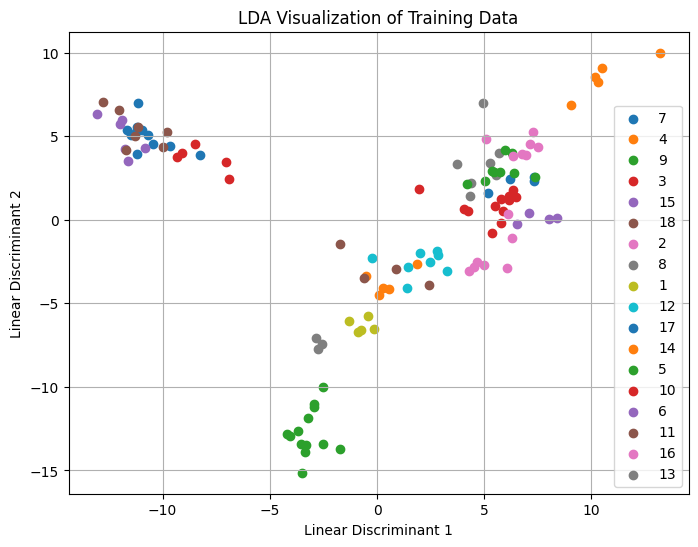

In [13]:
# Visualize the LDA results
plt.figure(figsize=(8, 6))
for label in lda_df['LABEL'].unique():
    subset = lda_df[lda_df['LABEL'] == label]
    plt.scatter(subset['LD1'], subset['LD2'], label=label)
plt.title('LDA Visualization of Training Data')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend()
plt.grid()
plt.show()

In [14]:
# Evaluate LDA on testing set
X_test_transformed = lda.transform(X_test)
print("LDA applied to testing data. Shape of transformed testing data:", X_test_transformed.shape)

LDA applied to testing data. Shape of transformed testing data: (53, 2)


In [15]:
# Explained variance ratio (useful for understanding variance captured by each LD)
explained_variance = lda.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.44074568 0.30866009]


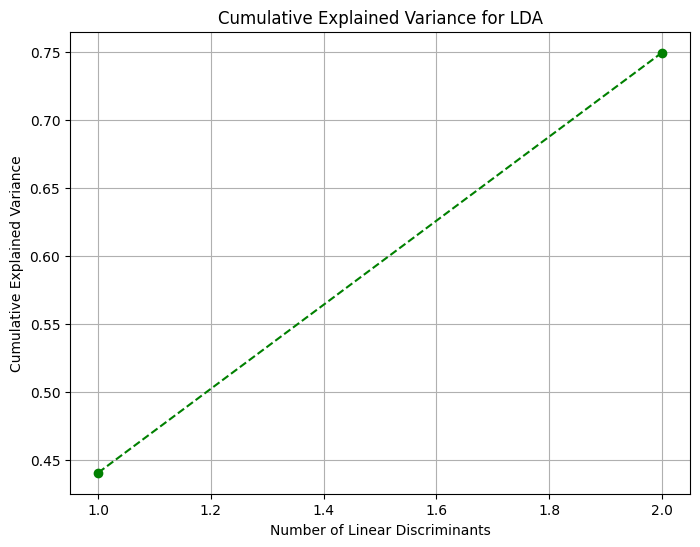

In [16]:
# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='g')
plt.title('Cumulative Explained Variance for LDA')
plt.xlabel('Number of Linear Discriminants')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()